In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Интесивность в центре не 0, как она влияет
# поработать с литературой ссылка
#комплекная амплитуда, сами выделить из нее фазы
# 2 метода 
# 20 мая

In [4]:
# Метод определения branch_point'ов почти идеально определяет топологический заряд

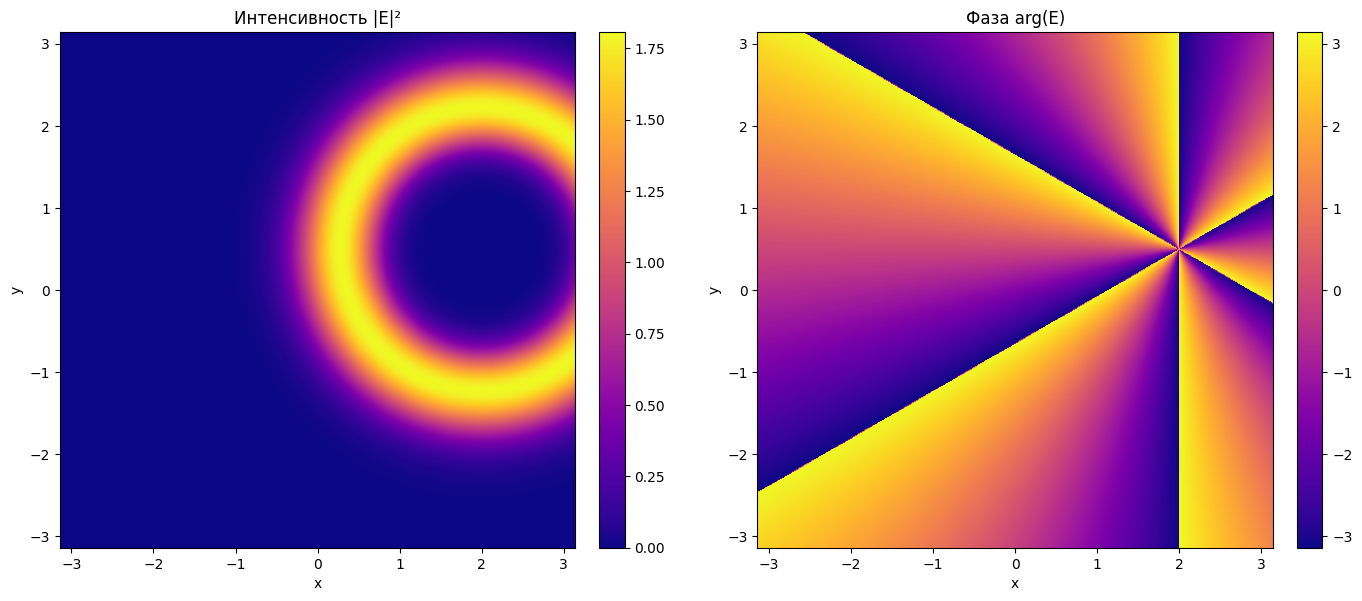

In [188]:
m = 6  # топологический заряд
grid_size = 500
Edge = np.pi
x = np.linspace(-Edge, Edge, grid_size)
y = np.linspace(-Edge, Edge, grid_size)
X, Y = np.meshgrid(x, y)

X0, Y0 = 2, -0.5  # смещение центра вихря
R = np.sqrt((X - X0)**2 + (Y - Y0)**2)
Theta = np.arctan2(Y - Y0, X - X0)
amplitude = R**abs(m) * np.exp(-R**2)
field = amplitude * np.exp(1j * m * Theta)

# Визуализация
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Интенсивность
im0 = axs[0].imshow(np.abs(field)**2, extent=(-Edge, Edge, -Edge, Edge), cmap='plasma')
axs[0].set_title('Интенсивность |E|²')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
fig.colorbar(im0, ax=axs[0], fraction=0.046, pad=0.04)

# Фаза
im1 = axs[1].imshow(np.angle(field), extent=(-Edge, Edge, -Edge, Edge), cmap='plasma')
axs[1].set_title('Фаза arg(E)')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
fig.colorbar(im1, ax=axs[1], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

In [6]:
# В зависимости от топологического заряда подбирать локальные значения для стабилизатора дробной гладкости
# Сравнить 

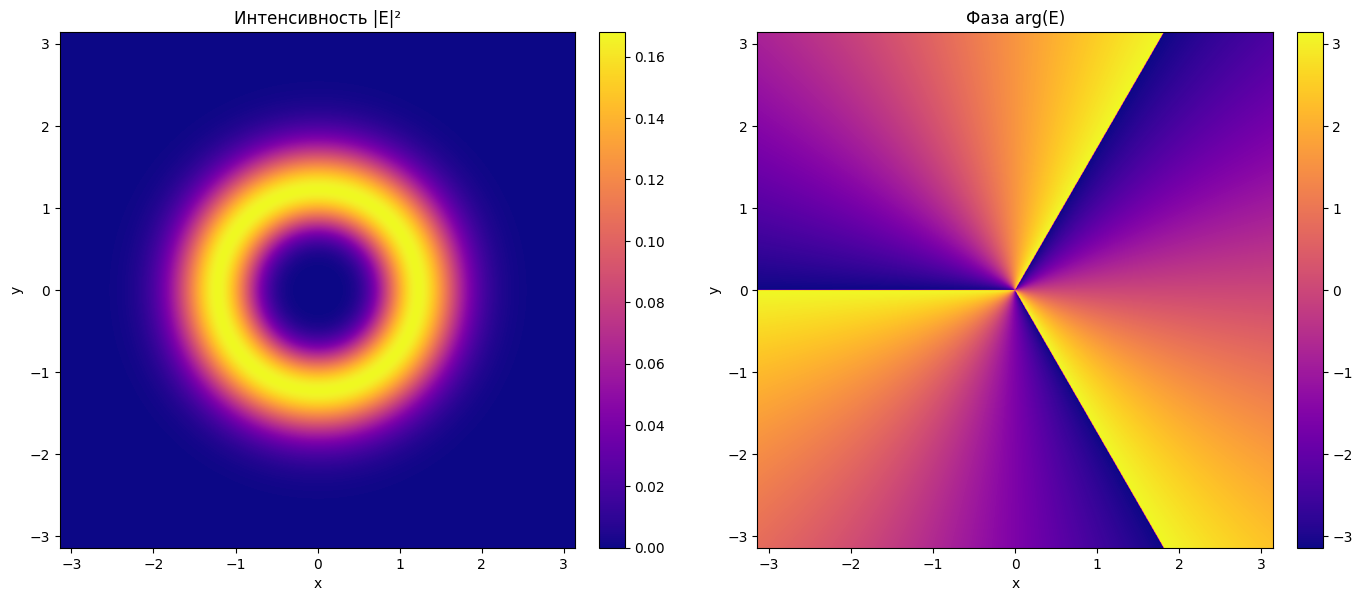

In [7]:
# R^m * e^(-R^2) * e^(i * m * teta)

# Параметры поля
m = 3  # топологический заряд
grid_size = 1000
Edge = np.pi
x = np.linspace(-Edge, Edge, grid_size)
y = np.linspace(-Edge, Edge, grid_size)
X, Y = np.meshgrid(x, y)

# Преобразуем в полярные координаты
R = np.sqrt(X**2 + Y**2)
Theta = np.arctan2(Y, X)

# Волновой фронт с фазовым вихрем
amplitude = (R)**abs(m) * np.exp(-R**2)
phase = m * Theta
field = amplitude * np.exp(1j * phase)

# Визуализация
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Интенсивность
im0 = axs[0].imshow(np.abs(field)**2, extent=(-Edge, Edge, -Edge, Edge), cmap='plasma')
axs[0].set_title('Интенсивность |E|²')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
fig.colorbar(im0, ax=axs[0], fraction=0.046, pad=0.04)

# Фаза
im1 = axs[1].imshow(np.angle(field), extent=(-Edge, Edge, -Edge, Edge), cmap='plasma')
axs[1].set_title('Фаза arg(E)')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
fig.colorbar(im1, ax=axs[1], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

In [8]:
from scipy.fft import fft2, ifft2, fftshift, ifftshift

In [189]:
p = np.angle(field)

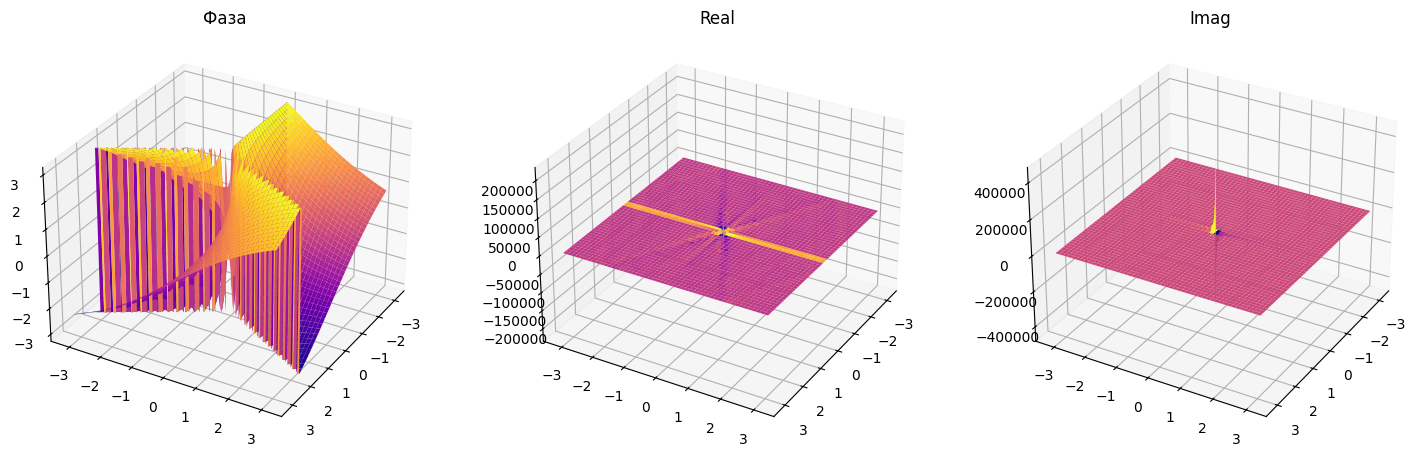

In [10]:
fig = plt.figure(figsize=(18, 9))  # Ширина 12 дюймов, высота 6 дюймов
ax = fig.add_subplot(131, projection='3d')
surf1 = ax.plot_surface(X, Y, p, cmap='plasma')
ax.set_title('Фаза')
# ax.set_zlim([0, np.max(fm)])
ax.view_init(30, 30)
# fig.colorbar(surf1, location='bottom', shrink=0.6, aspect=7)

ax = fig.add_subplot(132, projection='3d')
surf2 = ax.plot_surface(X, Y, ifftshift(fft2(fftshift(p))).real, cmap='plasma')
ax.set_title('Real')
# ax.set_zlim([0, np.max((z_approx - offs))])
ax.view_init(30, 30)
# fig.colorbar(surf2, location='bottom', shrink=0.6, aspect=7)

ax = fig.add_subplot(133, projection='3d')
surf2 = ax.plot_surface(X, Y, ifftshift(fft2(fftshift(p))).imag, cmap='plasma')
ax.set_title('Imag')
# ax.set_zlim([0, np.max((z_approx - offs))])
ax.view_init(30, 30)
plt.show()

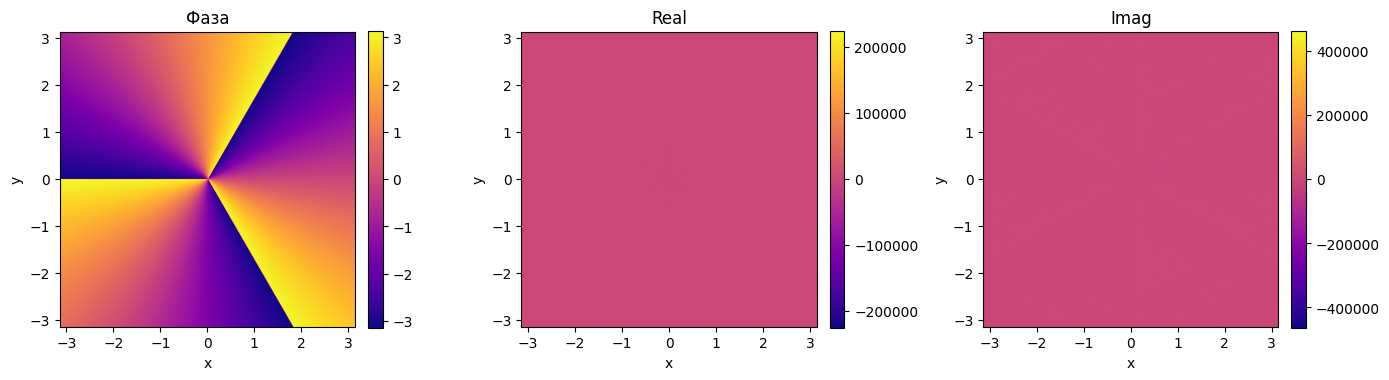

In [11]:
# Визуализация
fig, axs = plt.subplots(1, 3, figsize=(14, 6))

# Интенсивность
im0 = axs[0].imshow(p, extent=(-Edge, Edge, -Edge, Edge), cmap='plasma')
axs[0].set_title('Фаза')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
fig.colorbar(im0, ax=axs[0], fraction=0.046, pad=0.04)

# Фаза
im1 = axs[1].imshow(ifftshift(fft2(fftshift(p))).real, extent=(-Edge, Edge, -Edge, Edge), cmap='plasma')
axs[1].set_title('Real')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
fig.colorbar(im1, ax=axs[1], fraction=0.046, pad=0.04)

# Фаза
im1 = axs[2].imshow(ifftshift(fft2(fftshift(p))).imag, extent=(-Edge, Edge, -Edge, Edge), cmap='plasma')
axs[2].set_title('Imag')
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
fig.colorbar(im1, ax=axs[2], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

In [12]:
def dfx(z, h):
    z_roll = np.roll(z, -1, axis=1)  # Сдвиг значений влево (с учетом периодичности)
    return (z_roll - z) / h

def dfy(z, h):
    z_roll = np.roll(z, -1, axis=0)  # Сдвиг значений вверх (с учетом периодичности)
    return (z_roll - z) / h

In [190]:
h = 2 * Edge / (grid_size - 1)

In [191]:
dx = dfx(p, h)
dy = dfy(p, h)

In [15]:
np.pi / h

499.50000000000006

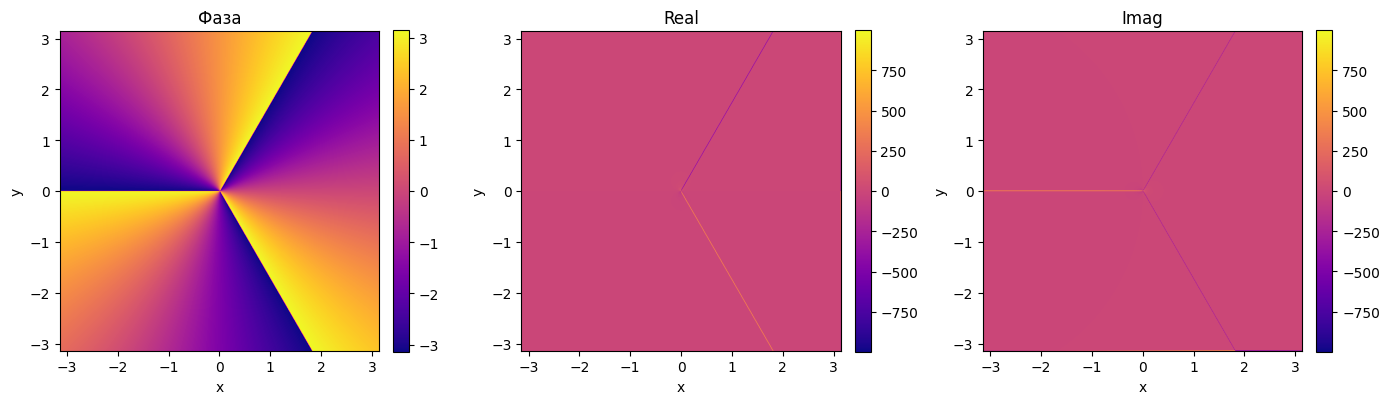

In [16]:
# Визуализация
fig, axs = plt.subplots(1, 3, figsize=(14, 6))

# Интенсивность
im0 = axs[0].imshow(p, extent=(-Edge, Edge, -Edge, Edge), cmap='plasma')
axs[0].set_title('Фаза')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
fig.colorbar(im0, ax=axs[0], fraction=0.046, pad=0.04)

# Фаза
im1 = axs[1].imshow(dx, extent=(-Edge, Edge, -Edge, Edge), cmap='plasma')
axs[1].set_title('Real')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
fig.colorbar(im1, ax=axs[1], fraction=0.046, pad=0.04)

# Фаза
im1 = axs[2].imshow(dy, extent=(-Edge, Edge, -Edge, Edge), cmap='plasma')
axs[2].set_title('Imag')
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
fig.colorbar(im1, ax=axs[2], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

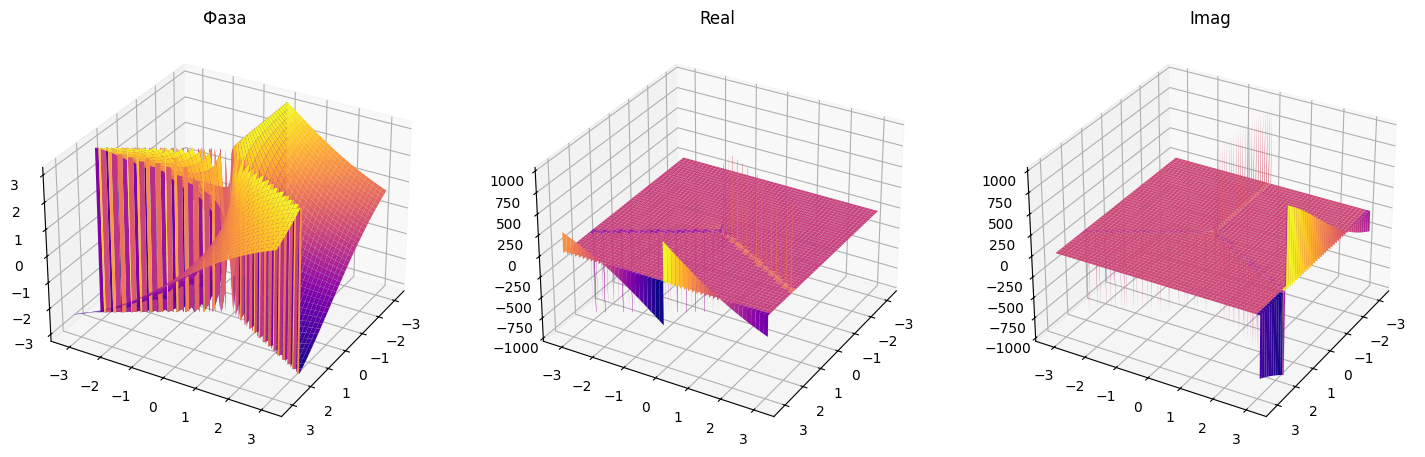

In [17]:
fig = plt.figure(figsize=(18, 9))  # Ширина 12 дюймов, высота 6 дюймов
ax = fig.add_subplot(131, projection='3d')
surf1 = ax.plot_surface(X, Y, p, cmap='plasma')
ax.set_title('Фаза')
# ax.set_zlim([0, np.max(fm)])
ax.view_init(30, 30)
# fig.colorbar(surf1, location='bottom', shrink=0.6, aspect=7)

ax = fig.add_subplot(132, projection='3d')
surf2 = ax.plot_surface(X, Y, dx, cmap='plasma')
ax.set_title('Real')
# ax.set_zlim([0, np.max((z_approx - offs))])
ax.view_init(30, 30)
# fig.colorbar(surf2, location='bottom', shrink=0.6, aspect=7)

ax = fig.add_subplot(133, projection='3d')
surf2 = ax.plot_surface(X, Y, dy, cmap='plasma')
ax.set_title('Imag')
# ax.set_zlim([0, np.max((z_approx - offs))])
ax.view_init(30, 30)
plt.show()

In [18]:
def shiftrow(arr, shift):  # Сдвиг строк
    arr = np.roll(arr, axis=0, shift=shift)
    # arr[shift, :] = arr[shift - 1, :]
    return arr


def shiftcolumn(arr, shift):  # Сдвиг столбцов
    arr = np.roll(arr, axis=1, shift=shift)
    # arr[:, shift] = arr[:, shift - 1]
    return arr


def fx(func, pnt_cnt, edge):  # Частная производная по x
    d = 2 * edge / pnt_cnt
    return (shiftrow(func, pnt_cnt - 1) - shiftrow(func, 1)) / (2 * d)


def fy(func, pnt_cnt, edge):  # Частная производная по y
    d = 2 * edge / pnt_cnt
    return (shiftcolumn(func, pnt_cnt - 1) - shiftcolumn(func, 1)) / (2 * d)

In [19]:
dx2 = fx(p, grid_size, Edge)
dy2 = fy(p, grid_size, Edge)

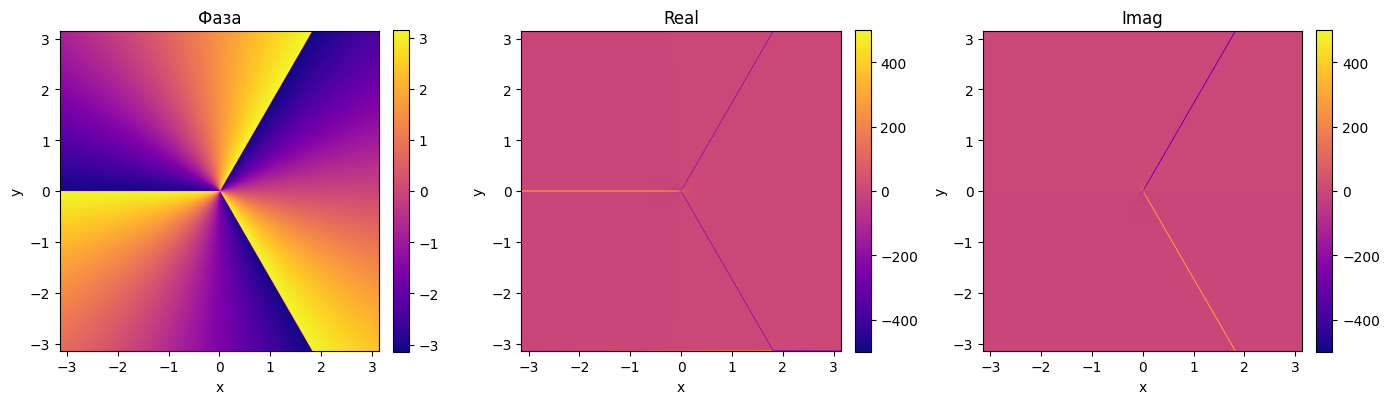

In [20]:
# Визуализация
fig, axs = plt.subplots(1, 3, figsize=(14, 6))

# Интенсивность
im0 = axs[0].imshow(p, extent=(-Edge, Edge, -Edge, Edge), cmap='plasma')
axs[0].set_title('Фаза')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
fig.colorbar(im0, ax=axs[0], fraction=0.046, pad=0.04)

# Фаза
im1 = axs[1].imshow(dx2, extent=(-Edge, Edge, -Edge, Edge), cmap='plasma')
axs[1].set_title('Real')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
fig.colorbar(im1, ax=axs[1], fraction=0.046, pad=0.04)

# Фаза
im1 = axs[2].imshow(dy2, extent=(-Edge, Edge, -Edge, Edge), cmap='plasma')
axs[2].set_title('Imag')
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
fig.colorbar(im1, ax=axs[2], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

In [21]:
def principal_value(x):
    # Приводим значение x в интервал [-pi, pi]
    while x > np.pi:
        x -= 2 * np.pi
    while x <= -np.pi:
        x += 2 * np.pi
    return x

In [22]:
def count_branch_sum(dx, dy, N, h, d1 = 20, d2 = 20, d3 = 20, d4 = 20):

    sum = 0

    # Движение вправо
    for j in range(d1, N - d3):
        sum += principal_value(dx[d2][j]) * h

    # Движение вниз
    for i in range(d2, N - d4):
        sum += principal_value(dy[i][N - d3 - 1]) * h

    # Движение влево
    for j in range(N - d3 - 1, d1, -1):
        sum += -principal_value(dx[N - d4 - 1][j - 1]) * h

    # Движение вверх
    for i in range(N - d4 - 1, d2, -1):
        sum += -principal_value(dy[i - 1][d1]) * h
    return sum

In [50]:
def count_branch_sum_by_coords(dx, dy, x1, y1, x2, y2, h):
    """
    Вычисляет интеграл по прямоугольному контуру от (x1, y1) до (x2, y2)
    по положительным направлениям (по часовой стрелке).
    Аргументы:
        dx, dy — матрицы производных
        (x1, y1) — верхний левый угол
        (x2, y2) — нижний правый угол
        h — шаг сетки
    """
    total = 0.0

    # Вправо по верхнему краю
    for j in range(x1, x2):
        total += principal_value(dx[y1, j]) * h

    # Вниз по правому краю
    for i in range(y1, y2):
        total += principal_value(dy[i, x2]) * h

    # Влево по нижнему краю
    for j in range(x2, x1, -1):
        total += -principal_value(dx[y2, j - 1]) * h

    # Вверх по левому краю
    for i in range(y2, y1, -1):
        total += -principal_value(dy[i - 1, x1]) * h

    return total

In [67]:
count_branch_sum_by_coords(dx, dy,
                                   60, 60,
                                   90, 90,
                                   h) / np.pi

np.float64(3.046392876208285)

In [58]:
def detect_vortices(dx, dy, h, window=20, threshold=np.pi):
    N = dx.shape[0]
    vortex_list = []

    half = window // 2
    for i in range(half, N - half, 1):
        for j in range(half, N - half, 1):
            # Считаем циркуляцию в окне с центром (i, j)
            circ = count_branch_sum_by_coords(dx, dy,
                                   j - half, i - half,
                                   j + half, i + half,
                                   h)
            # Приводим к кратному 2π и округляем
            winding_number = round(circ / (2 * np.pi))
            
            if winding_number != 0:
                print(winding_number)

            if abs(circ - 2 * np.pi * winding_number) < threshold and winding_number != 0:
                vortex_list.append((j, i, winding_number))  # (x, y, charge)
            

    return vortex_list

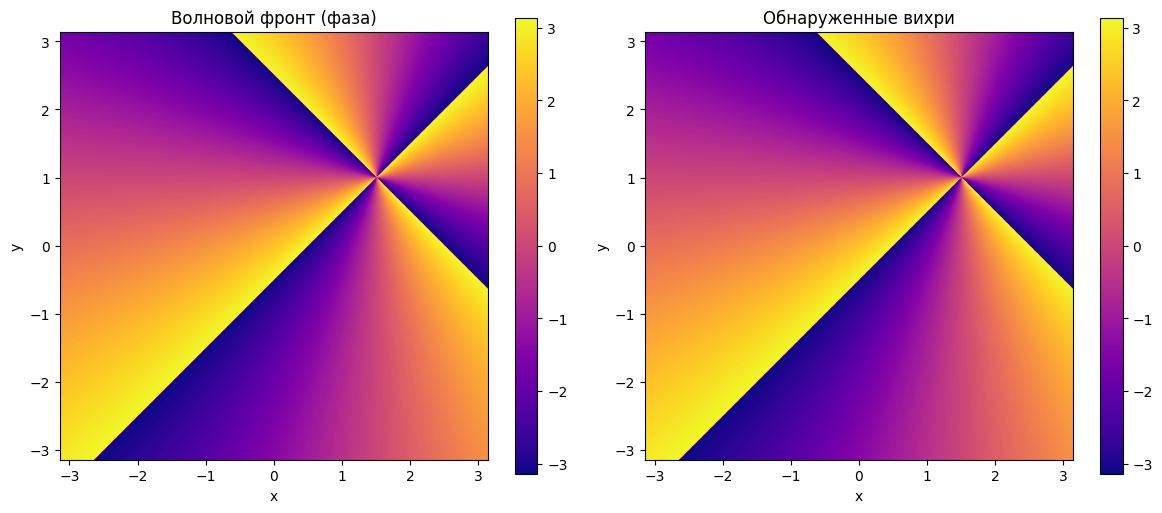

In [179]:
vortices = detect_vortices(dx, dy, h, window=7)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# 1. Слева — фазовый фронт
im1 = axs[0].imshow(p, cmap='plasma', origin='lower', extent=[x.min(), x.max(), y.min(), y.max()])
axs[0].set_title("Волновой фронт (фаза)")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
fig.colorbar(im1, ax=axs[0], shrink=0.8)

# 2. Справа — найденные вихри
im2 = axs[1].imshow(p, cmap='plasma', origin='lower', extent=[x.min(), x.max(), y.min(), y.max()])
for vx, vy, charge in vortices:
    print('aaaa')
    cx = x[vx]
    cy = y[vy]
    color = 'red' if charge > 0 else 'blue'
    axs[1].scatter(cx, cy, color=color, edgecolors='black', s=60, label=f"{charge:+}")
axs[1].set_title("Обнаруженные вихри")
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")
fig.colorbar(im2, ax=axs[1], shrink=0.8)

plt.tight_layout()
plt.show()

In [180]:
count_branch_sum(dx, dy, grid_size, h, 40, 40, 40, 600) / np.pi

np.float64(1.9907687540783419)

In [68]:
from scipy.ndimage import gaussian_filter, maximum_filter

In [172]:
def find_phase_singularity(du_dx, du_dy, h=1.0, threshold=None, sigma=1.0):
    # Вычисляем модуль градиента
    grad_mag = np.sqrt(du_dx**2 + du_dy**2)

    # Сглаживаем, чтобы уменьшить шум
    grad_mag_smooth = gaussian_filter(grad_mag, sigma=sigma)

    # Нормируем
    grad_mag_smooth /= grad_mag_smooth.max()

    # Порог выделения "линий разрыва"
    if threshold is None:
        threshold = 0.5  # эмпирически, можно подстроить

    mask = grad_mag_smooth > threshold

    # Поиск локальных максимумов для "центра"
    local_max = maximum_filter(grad_mag_smooth, size=5)
    peaks = (grad_mag_smooth == local_max) & mask

    # Получаем координаты пиков
    y_coords, x_coords = np.where(peaks)

    return x_coords, y_coords, grad_mag_smooth, mask

# Пример использования (если у вас есть du_dx и du_dy):
# x_peaks, y_peaks, grad_smooth, mask = find_phase_singularity(du_dx, du_dy)

In [ ]:
def find_phase_singularity_v2(du_dx, du_dy, h=1.0, threshold=None, sigma=1.0, use_component_mask=False):
    grad_mag = np.sqrt(du_dx**2 + du_dy**2)
    grad_mag_smooth = gaussian_filter(grad_mag, sigma=sigma)
    grad_mag_smooth /= grad_mag_smooth.max()

    if threshold is None:
        threshold = 0.5

    if use_component_mask:
        mask_x = gaussian_filter(np.abs(du_dx), sigma=sigma) > threshold
        mask_y = gaussian_filter(np.abs(du_dy), sigma=sigma) > threshold
        mask = mask_x | mask_y
    else:
        mask = grad_mag_smooth > threshold

    local_max = maximum_filter(grad_mag_smooth, size=5)
    peaks = (grad_mag_smooth == local_max) & mask

    y_coords, x_coords = np.where(peaks)
    return x_coords, y_coords, grad_mag_smooth, mask

In [192]:
x_peaks, y_peaks, grad_smooth, mask = find_phase_singularity(dx, dy)

In [194]:
x_peaks, y_peaks, grad_smooth, mask = find_phase_singularity_v2(dx, dy, threshold=0.1, sigma=1.0, use_component_mask=True)

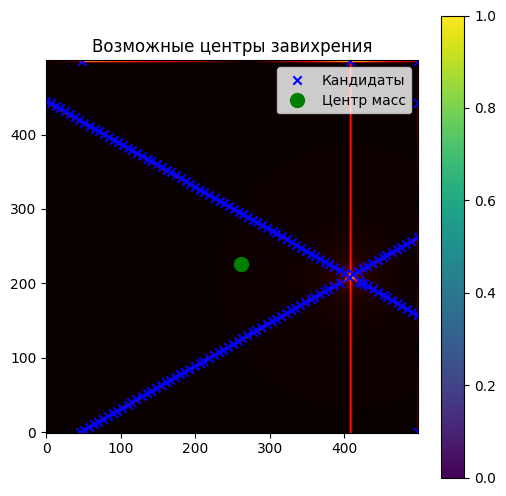

In [195]:
# Вычисляем центр масс
center_x = np.mean(x_peaks)
center_y = np.mean(y_peaks)

# Визуализация
plt.figure(figsize=(6,6))
plt.imshow(grad_smooth, cmap='hot', origin='lower')
plt.contour(mask, colors='cyan', linewidths=0.5)
plt.scatter(x_peaks, y_peaks, c='blue', marker='x', label='Кандидаты')
plt.plot(center_x, center_y, 'go', markersize=10, label='Центр масс')  # зелёный кружок
plt.title("Возможные центры завихрения")
plt.legend()
plt.colorbar()
plt.show()

In [125]:
def add_noise(z, perc, N):
    ampl = abs(z.max() - z.min()) * perc
    return z + ampl * np.random.randn(N, N)

In [196]:
p_noise = add_noise(p, 0.1, grid_size)

In [197]:
dx_noise = dfx(p_noise, h)
dy_noise = dfy(p_noise, h)

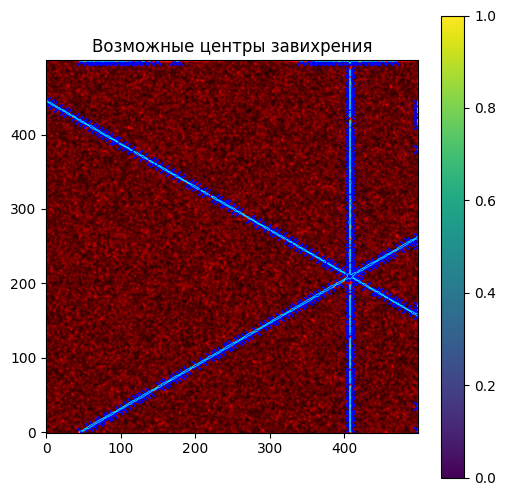

In [198]:
x_peaks, y_peaks, grad_smooth, mask = find_phase_singularity(dx_noise, dy_noise)
plt.figure(figsize=(6,6))
plt.imshow(grad_smooth, cmap='hot', origin='lower')
plt.contour(mask, colors='cyan', linewidths=0.5)
plt.scatter(x_peaks, y_peaks, c='blue', marker='x')
plt.title("Возможные центры завихрения")
plt.colorbar()
plt.show()

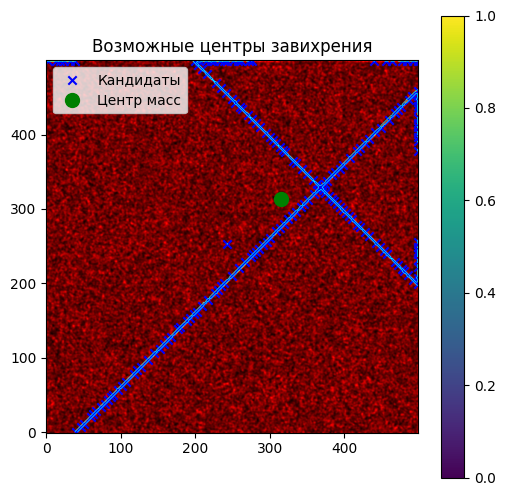

In [187]:
# Вычисляем центр масс
center_x = np.mean(x_peaks)
center_y = np.mean(y_peaks)

# Визуализация
plt.figure(figsize=(6,6))
plt.imshow(grad_smooth, cmap='hot', origin='lower')
plt.contour(mask, colors='cyan', linewidths=0.5)
plt.scatter(x_peaks, y_peaks, c='blue', marker='x', label='Кандидаты')
plt.plot(center_x, center_y, 'go', markersize=10, label='Центр масс')  # зелёный кружок
plt.title("Возможные центры завихрения")
plt.legend()
plt.colorbar()
plt.show()

In [98]:
# Преобразуем в массив Nx2 вида [[y1, x1], [y2, x2], ...]
points = np.column_stack((y_peaks, x_peaks))

# Центр масс (сначала по y, потом по x)
center_y, center_x = points.mean(axis=0)

print(f"Центр завихрения (y, x): ({center_y:.2f}, {center_x:.2f})")

Центр завихрения (y, x): (318.32, 371.27)


In [4]:
from method import method_v

In [29]:
approx_noise = method_v(add_noise(p, 0.2, grid_size), grid_size, Edge, 1, 0.5, 1)

In [13]:
approx = method_v(p, grid_size, Edge, 0)

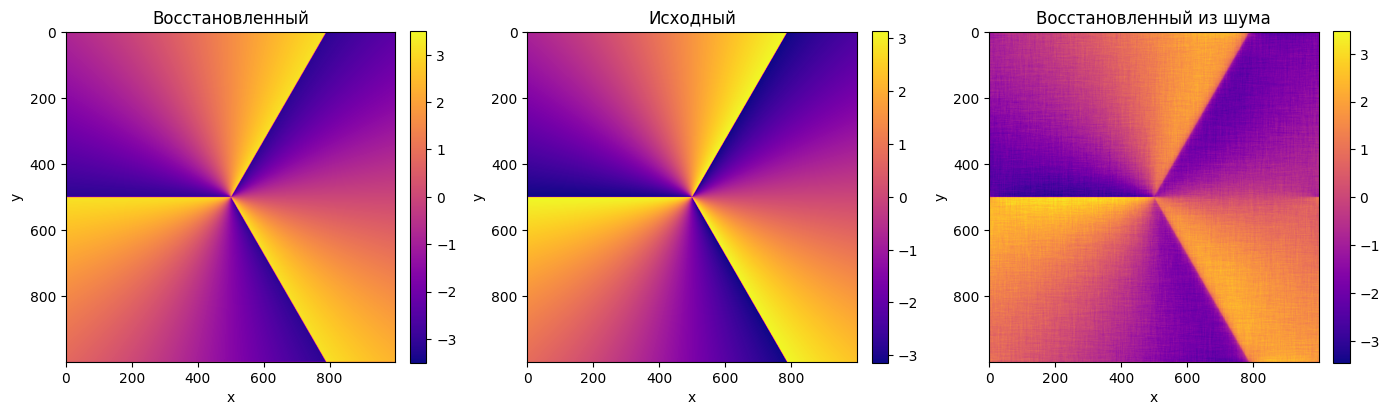

In [25]:
# Визуализация
fig, axs = plt.subplots(1, 3, figsize=(14, 6))

im0 = axs[0].imshow(approx, cmap='plasma')
axs[0].set_title('Восстановленный')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
fig.colorbar(im0, ax=axs[0], fraction=0.046, pad=0.04)

im1 = axs[1].imshow(p, cmap='plasma')
axs[1].set_title('Исходный')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
fig.colorbar(im1, ax=axs[1], fraction=0.046, pad=0.04)

im1 = axs[2].imshow(approx_noise, cmap='plasma')
axs[2].set_title('Восстановленный из шума')
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
fig.colorbar(im1, ax=axs[2], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

In [30]:
def nullify_near_2pi(z, m):
    # Создаем копию матрицы z, чтобы не изменять оригинал
    z_nullified = z.copy()
    
    # Определяем размеры матрицы
    rows, cols = z.shape
    
    # Получаем центр матрицы
    center_x, center_y = rows // 2, cols // 2
    
    # Определяем углы лучей
    angles = np.linspace(0, 2 * np.pi, m, endpoint=False)
    
    # Если m нечетное, добавляем дополнительный луч
    if m % 2 != 0:
        angles[0] = np.pi  # Первый луч направлен влево по оси x (0,0) - (-4, 0)
    
    # Проходим по каждому углу
    for angle in angles:
        # Обнуляем значения вдоль луча
        for r in range(max(rows, cols)):
            # Вычисляем координаты точки вдоль луча
            x = int(center_x + r * np.cos(angle))
            y = int(center_y + r * np.sin(angle))
            
            # Проверяем границы матрицы
            if 0 <= x < rows and 0 <= y < cols:
                z_nullified[x, y] = np.nan  # Обнуляем значение

    return z_nullified

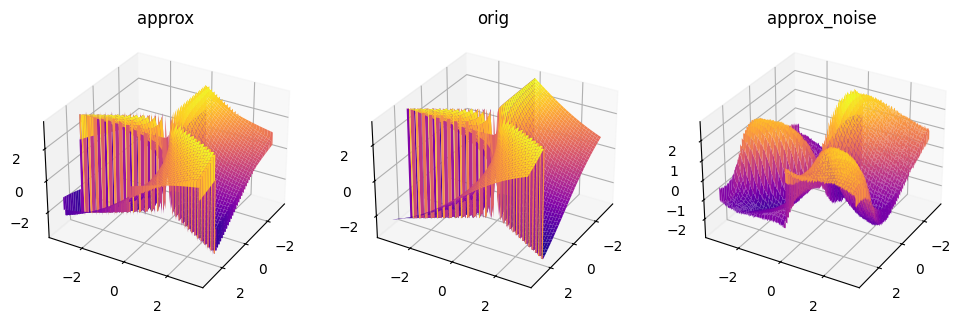

In [31]:
fig = plt.figure(figsize=(12, 6))  # Ширина 12 дюймов, высота 6 дюймов
ax = fig.add_subplot(131, projection='3d')
surf1 = ax.plot_surface(X, Y, approx, cmap='plasma')
ax.set_title('approx')
# ax.set_zlim([0, np.max(fm)])
ax.view_init(30, 30)
# fig.colorbar(surf1, location='bottom', shrink=0.6, aspect=7)

ax = fig.add_subplot(132, projection='3d')
surf2 = ax.plot_surface(X, Y, p, cmap='plasma')
ax.set_title('orig')
# ax.set_zlim([0, np.max((z_approx - offs))])
ax.view_init(30, 30)
# fig.colorbar(surf2, location='bottom', shrink=0.6, aspect=7)

ax = fig.add_subplot(133, projection='3d')
surf2 = ax.plot_surface(X, Y, approx_noise, cmap='plasma')
ax.set_title('approx_noise')
# ax.set_zlim([0, np.max((z_approx - offs))])
ax.view_init(30, 30)
plt.show()

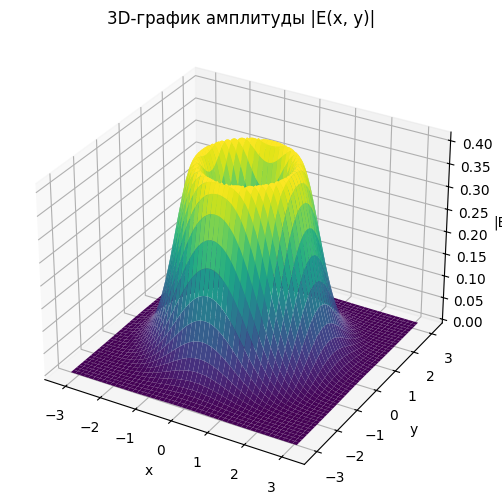

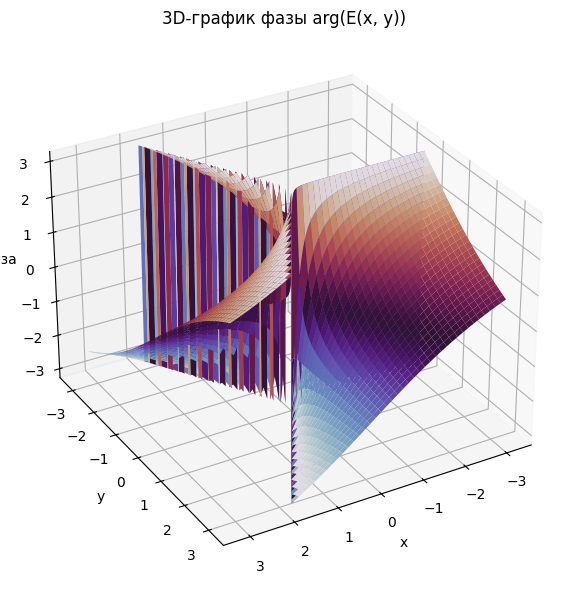

In [15]:
# ---------- 3D ПЛОТ АМПЛИТУДЫ ----------
fig3d_amp = plt.figure(figsize=(8, 6))
ax_amp = fig3d_amp.add_subplot(111, projection='3d')
ax_amp.plot_surface(X, Y, np.abs(field), cmap='viridis', linewidth=0, antialiased=True)

ax_amp.set_title('3D-график амплитуды |E(x, y)|')
ax_amp.set_xlabel('x')
ax_amp.set_ylabel('y')
ax_amp.set_zlabel('|E|')

# ---------- 3D ПЛОТ ФАЗЫ ----------
fig3d_phase = plt.figure(figsize=(8, 6))
ax_phase = fig3d_phase.add_subplot(111, projection='3d')
ax_phase.plot_surface(X, Y, np.angle(field), cmap='twilight', linewidth=0, antialiased=True)

ax_phase.view_init(30, 60)

ax_phase.set_title('3D-график фазы arg(E(x, y))')
ax_phase.set_xlabel('x')
ax_phase.set_ylabel('y')
ax_phase.set_zlabel('Фаза')

plt.tight_layout()
plt.show()